<a href="https://colab.research.google.com/github/Ruy8/Ruy8/blob/main/Parcial3_Simulacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

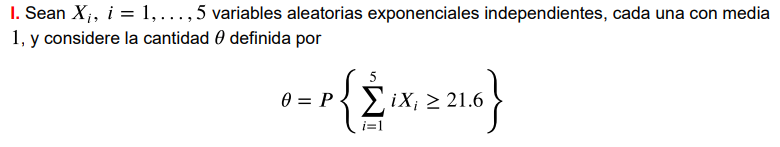

A) Explique cómo podemos utilizar la simulación para estimar *θ*. <br>
Al ser varias sumas de variables aleatorias exponenciales, da como resultado una Gamma(1,i).
Realizando un poco más de álgebra podemos llegar a nuestro estimador el cual sería: Σ (-i) (ln(U)) ≥ 21.6 

In [ ]:
w <- vector()
g <- 0

for(i in 1:1000){
  u <- runif(5)
  for(j in 1:5){
    h <- sum(-j*log(u[j]))
    g <- g+h
  }
  if(g>=21.6){
    w[i] <- 1
  }else{
    w[i] <- 0
  }
  g <- 0
}
cat("Media del estimador: ", mean(w))

Media del estimador:  0.177

B) De el estimador mediante variables antitéticas. <br>
Como el estimador anterior ya esta en terminos de distribución uniforme, ya tenemos una parte del estimador antitético, solo nos faltaría añadir la que esta inversamente correlacionada, entonces el estimador quedaría así: <br>
(0.5) [(Σ (-i) (ln(U)) ≥ 21.6) + (Σ (-i) (ln(1-U)) ≥ 21.6)]

In [ ]:
x <- c()
for(i in 1:1000){
  u <- runif(5)
  x <- c(x,0.5*((sum(-(1:5)*log(u))>=21.6) + (sum(-(1:5)*log(1-u))>=21.6)))
}

cat("Media del estimador antitético: ", mean(x))

Media del estimador antitético:  0.175

C) ¿En este caso es eficiente el uso de variables antitéticas? <br>
Para comprobar si es eficiente vamos a realizar el código

In [ ]:
%%R
cat("Varianza del estimador: ", var(w))
cat("\nVarianza del estimador antitético: ", var(x))
dif <- (var(w)-var(x))/var(w)
cat("\nEl porcentaje de reducción de varianza es: ", dif*100)

Varianza del estimador:  0.1458168
Varianza del estimador antitético:  0.05793293
El porcentaje de reducción de varianza es:  60.27006

Podemos ver que la varianza del estimador antitético es menor que la del estimador normal, por lo que se confirma que si es eficiente en este caso.

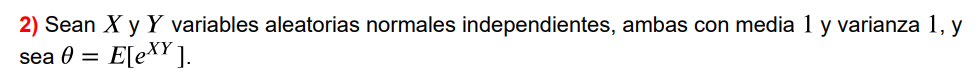

A) Explique cómo podemos utilizar la simulación para estimar θ.


In [ ]:
%%R
ex <- function(n){
  x <- rnorm(n, 1,1)
  y <- rnorm(n,1,1)
  E <- mean(exp(x*y))
  vxy <- var(exp(x*y))
  return(c(E, vxy))
}

est <- replicate(100, ex(100000))
cat("Mínimo: ", min(est[2,]))
cat("\nMáximo: ", max(est[2,]))


Mínimo:  28411696
Máximo:  4.165988e+12

B) Dé una variable de control y explique la forma de emplearla para obtener un estimador con una varianza menor que la del estimador en simulación en bruto del inciso A). <br>


In [ ]:
%%R
vcx <- function(n){
    X <- rnorm(n,1,1)
    Y <- rnorm(n,1,1)
    cv <- -cov(exp(X*Y), exp(Y)/var(exp(Y)))
    E <- mean(exp(X*Y)+ c*mean(exp(Y)-exp(3/2)))
    return(E)
}
esp <- replicate(100, vcx(100000))
var(esp)

[1] 6901675
